In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
brazil_df=pd.read_excel('covid19_clinical_dataset.xlsx')

# Finding insights of the data and what it consist of

In [3]:
brazil_df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
brazil_df.tail()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preparation

In [5]:
#Replacing all the boolean values for 0 and 1
brazil_df.replace('not_detected', 0, inplace=True)
brazil_df.replace('detected', 0, inplace=True)
brazil_df.replace('negative', 0, inplace=True)
brazil_df.replace('positive', 1, inplace=True)
brazil_df.replace('absent', 0, inplace=True)
brazil_df.replace('present', 1, inplace=True)


In [6]:
#seeing all the columns with object type values and their count
brazil_df.select_dtypes(include='object').nunique()

Patient ID               5644
Strepto A                   3
Urine - Esterase            2
Urine - Aspect              4
Urine - pH                 15
Urine - Hemoglobin          3
Urine - Bile pigments       2
Urine - Ketone Bodies       2
Urine - Nitrite             1
Urine - Urobilinogen        2
Urine - Protein             2
Urine - Leukocytes         31
Urine - Crystals            5
Urine - Color               4
dtype: int64

In [7]:
brazil_df['Strepto A'].unique()

array([nan, 1, 0, 'not_done'], dtype=object)

In [8]:
brazil_df['Urine - Aspect'].unique()

array([nan, 'clear', 'cloudy', 'altered_coloring', 'lightly_cloudy'],
      dtype=object)

In [9]:
brazil_df['Urine - Esterase'].unique()

array([nan, 0, 'not_done'], dtype=object)

In [10]:
brazil_df['Urine - pH'].unique()

array([nan, '6.5', '6.0', 'Não Realizado', '5.0', '7.0', '5', '5.5',
       '7.5', '6', '8.0', 6, 6.5, 7, 5, 5.5], dtype=object)

In [11]:
brazil_df['Urine - Hemoglobin'].unique()

array([nan, 0, 1, 'not_done'], dtype=object)

In [12]:
brazil_df['Urine - Bile pigments'].unique()

array([nan, 0, 'not_done'], dtype=object)

In [13]:
brazil_df['Urine - Ketone Bodies'].unique()

array([nan, 0, 'not_done'], dtype=object)

In [14]:
brazil_df['Urine - Nitrite'].unique()
        

array([nan, 'not_done'], dtype=object)

In [15]:
brazil_df['Urine - Urobilinogen'].unique()

array([nan, 'normal', 'not_done'], dtype=object)

In [16]:
brazil_df['Urine - Protein'].unique()

array([nan, 0, 'not_done'], dtype=object)

In [17]:
brazil_df['Urine - Leukocytes'].unique()

array([nan, '38000', '5942000', '32000', '22000', '<1000', '3000',
       '16000', '7000', '5300', '1000', '4000', '5000', '10600', '6000',
       '2500', '2600', '23000', '124000', '8000', '29000', '2000',
       '624000', '40000', '3310000', '229000', '19000', '28000', '10000',
       '4600', '77000', '43000'], dtype=object)

In [18]:
brazil_df['Urine - Crystals'].unique()

array([nan, 'Ausentes', 'Urato Amorfo --+', 'Oxalato de Cálcio +++',
       'Oxalato de Cálcio -++', 'Urato Amorfo +++'], dtype=object)

In [19]:
brazil_df['Urine - Color'].unique()

array([nan, 'light_yellow', 'yellow', 'orange', 'citrus_yellow'],
      dtype=object)

In [20]:
#dropping the object column wich are having only the [nan,notdone and 0 values] in them 
brazil_df.drop(['Urine - Esterase','Urine - Bile pigments','Urine - Ketone Bodies','Urine - Nitrite','Urine - Protein'],axis=1,inplace=True)

In [21]:
#changing <1000 as 999 and dtype of brazil_df['Urine - Leukocytes'] column
brazil_df['Urine - Leukocytes'].replace('<1000', '999', inplace=True)
brazil_df['Urine - Leukocytes'] = brazil_df['Urine - Leukocytes'].astype('float64')

In [22]:
#Using label Encoder to the categorical variables to numeric form
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [23]:
brazil_df['Urine - Aspect']=brazil_df['Urine - Aspect'].astype(str)

In [24]:
brazil_df['Urine - Aspect']=lb.fit_transform(brazil_df['Urine - Aspect'])

In [25]:
brazil_df['Urine - Aspect'] = brazil_df['Urine - Aspect'].astype("float64")

In [26]:
brazil_df['Urine - Urobilinogen'] = brazil_df['Urine - Urobilinogen'].astype(str)
brazil_df['Urine - Urobilinogen'] = lb.fit_transform(brazil_df['Urine - Urobilinogen'])
brazil_df['Urine - Urobilinogen'] = brazil_df['Urine - Urobilinogen'].astype("float64")

In [27]:
brazil_df['Urine - Crystals'] = brazil_df['Urine - Crystals'].astype(str)
brazil_df['Urine - Crystals'] = lb.fit_transform(brazil_df['Urine - Crystals'])
brazil_df['Urine - Crystals'] = brazil_df['Urine - Crystals'].astype("float64")

In [28]:
brazil_df['Urine - Color'] = brazil_df['Urine - Color'].astype(str)
brazil_df['Urine - Color'] = lb.fit_transform(brazil_df['Urine - Color'])
brazil_df['Urine - Color'] = brazil_df['Urine - Color'].astype("float64")

In [29]:
brazil_df['Urine - pH'].replace('Não Realizado', np.nan, inplace=True)

In [30]:
brazil_df['Urine - pH']=brazil_df['Urine - pH'].astype("float64")

In [31]:
#findinf the number of rows and columns in thye dataset
brazil_df.shape

(5644, 106)

In [32]:
#finding the information about the dataset
brazil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 106 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(98), int64(5), object(3)
memory usage: 4.6+ MB


In [33]:
brazil_df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=106)

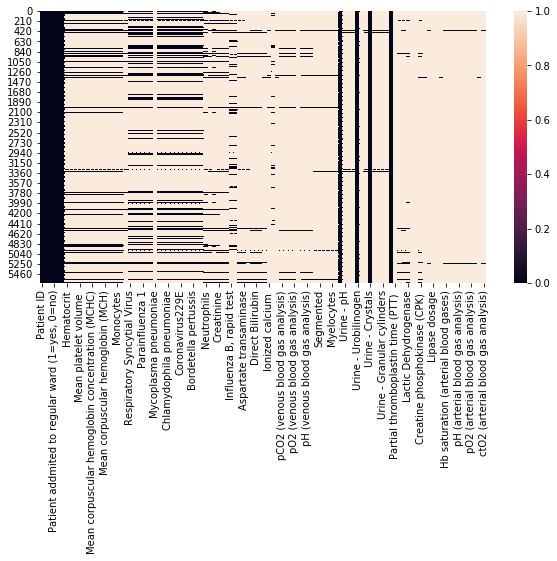

In [34]:
#cheking for null values
plt.figure(figsize=(10,5))
sns.heatmap(brazil_df.isnull())

In [35]:
brazil_df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 106, dtype: int64

In [36]:
#As there exits loads of missing values and on dropping the nan value whole dataset becomes null
#therefore Analysing the missing value and proceeding further
    
def get_data_missing(brazil_df):
    total = brazil_df.isnull().sum().sort_values(ascending=False)
    percent = (brazil_df.isnull().sum()/brazil_df.isnull().count()).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


data_missing=get_data_missing(brazil_df)
data_missing.head(30)


,Total,Percent
D-Dimer,5644,1.000000
Mycoplasma pneumoniae,5644,1.000000
Urine - Sugar,5644,1.000000
"Prothrombin time (PT), Activity",5644,1.000000
Partial thromboplastin time (PTT),5644,1.000000
Fio2 (venous blood gas analysis),5643,0.999823
Vitamin B12,5641,0.999468
Lipase dosage,5636,0.998583
Albumin,5631,0.997697
Arteiral Fio2,5624,0.996456


In [37]:
#Dividing the datset into two parts by SARS-Cov-2 exam result 'positive' and 'Negative'

positive_df=brazil_df[brazil_df['SARS-Cov-2 exam result'] == 1]
data_missing_positive=get_data_missing(positive_df)
data_missing_positive.head(10)

,Total,Percent
Mycoplasma pneumoniae,558,1.000000
Albumin,558,1.000000
Partial thromboplastin time (PTT),558,1.000000
"Prothrombin time (PT), Activity",558,1.000000
Vitamin B12,558,1.000000
D-Dimer,558,1.000000
Urine - Sugar,558,1.000000
Fio2 (venous blood gas analysis),558,1.000000
Phosphor,557,0.998208
Ferritin,556,0.996416


In [38]:
negative_df=brazil_df[brazil_df['SARS-Cov-2 exam result'] == 0]
data_missing_negative=get_data_missing(negative_df)
data_missing_negative.head(10)

,Total,Percent
D-Dimer,5086,1.000000
Mycoplasma pneumoniae,5086,1.000000
Urine - Sugar,5086,1.000000
"Prothrombin time (PT), Activity",5086,1.000000
Partial thromboplastin time (PTT),5086,1.000000
Fio2 (venous blood gas analysis),5085,0.999803
Vitamin B12,5083,0.999410
Lipase dosage,5081,0.999017
Arteiral Fio2,5075,0.997837
Albumin,5073,0.997444


In [39]:
num_postv_cases=len(positive_df.index)

num_negtv_cases=len(negative_df.index)

(-1.1043893148273543,
 1.1002090207918014,
 -1.1069185895092732,
 1.1076132200227402)

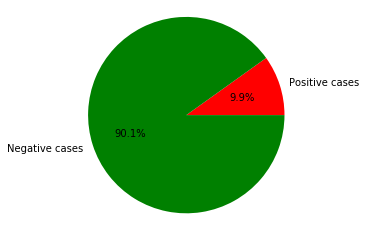

In [40]:
plt.pie([num_postv_cases, num_negtv_cases], labels=['Positive cases', 'Negative cases'], autopct='%1.1f%%',colors=['red', 'green'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [41]:
#here we can see that number of negative cases is much higher than that of positive cases

In [42]:
drop_column= data_missing_positive.index[data_missing_positive['Percent']>0.99].tolist()

In [43]:
brazil_df.drop(columns=drop_column, inplace=True)

In [44]:
brazil_df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Arterial Lactic Acid,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
brazil_df.tail()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Arterial Lactic Acid,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,1,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
brazil_df.shape

(5644, 94)

In [47]:
brazil_df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Para

In [48]:
#As we can see from  pie chart above, the dataset is highly imbalanced, 
#Therefore to balance the dataset we chose to keep only the rows with at least 20 non-NaN values.

In [49]:
df_positive=brazil_df[brazil_df['SARS-Cov-2 exam result'] == 1]

df_negative=brazil_df[brazil_df['SARS-Cov-2 exam result'] == 0]

In [50]:
df_negative=df_negative.dropna(axis=0, thresh=20)

In [51]:
num_postv_cases=len(df_positive.index)

num_negtv_cases=len(df_negative.index)

In [52]:
#now the datset is somewhat balanced

(-1.116021372950329, 1.100762959846553, -1.117564868895068, 1.111457988271845)

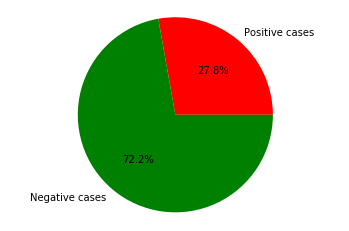

In [53]:
plt.pie([num_postv_cases, num_negtv_cases], labels=['Positive cases', 'Negative cases'], autopct='%1.1f%%',colors=['red', 'green'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [54]:
brazil_df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Arterial Lactic Acid,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
brazil_df.tail()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Arterial Lactic Acid,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,1,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
brazil_df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
Total CO2 (arterial blood gas analysis)                  5617
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
ctO2 (arterial blood gas analysis)                       5617
Length: 94, dtype: int64

In [57]:
#replacing the nan Value with zero

In [58]:
brazil_df.fillna(0)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Arterial Lactic Acid,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f7d619a94f97c45,5,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d9e41465789c2b5,15,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,1,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,517c2834024f3ea,17,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,5c57d6037fe266d,4,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,c20c44766f28291,10,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
brazil_df['Patient age quantile'].unique()

array([13, 17,  8,  5, 15,  9, 16,  1, 14, 11,  0,  3, 10,  6, 12, 19,  7,
       18,  2,  4], dtype=int64)

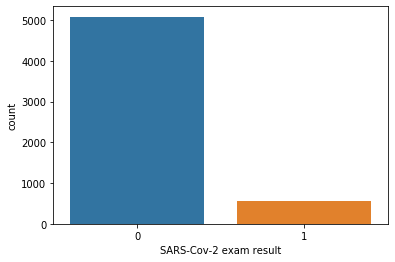

In [60]:
sns.countplot(brazil_df['SARS-Cov-2 exam result'])

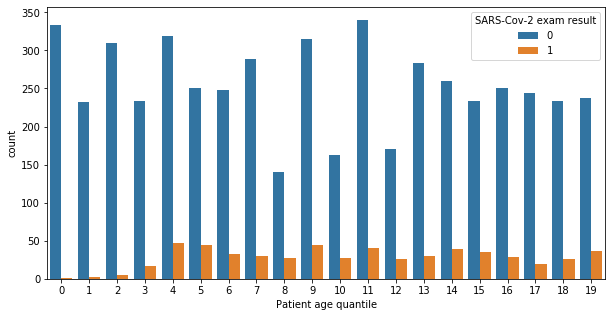

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(brazil_df['Patient age quantile'],hue=brazil_df['SARS-Cov-2 exam result'])

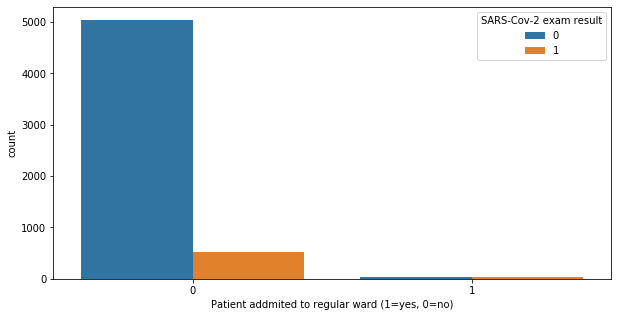

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(brazil_df['Patient addmited to regular ward (1=yes, 0=no)'],hue=brazil_df['SARS-Cov-2 exam result'])

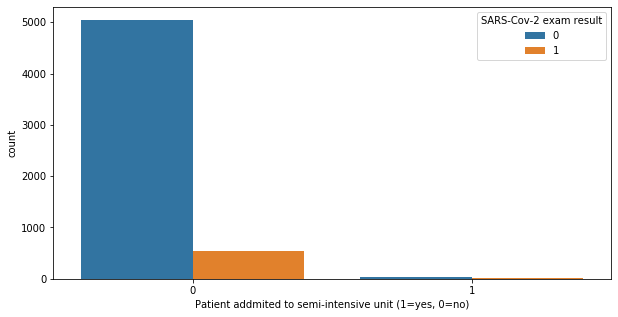

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(brazil_df['Patient addmited to semi-intensive unit (1=yes, 0=no)'],hue=brazil_df['SARS-Cov-2 exam result'])

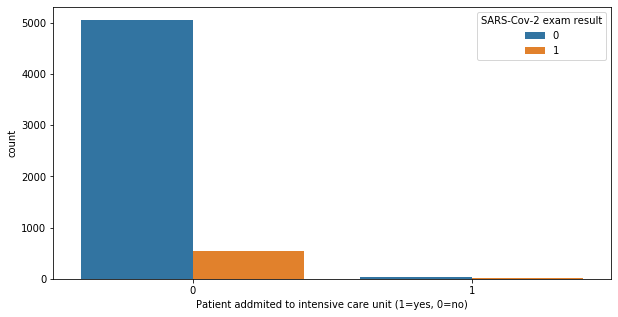

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(brazil_df['Patient addmited to intensive care unit (1=yes, 0=no)'],hue=brazil_df['SARS-Cov-2 exam result'])

In [65]:
brazil_df.drop(['Patient ID','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)',
               'Patient addmited to intensive care unit (1=yes, 0=no)'],axis=1,inplace=True)

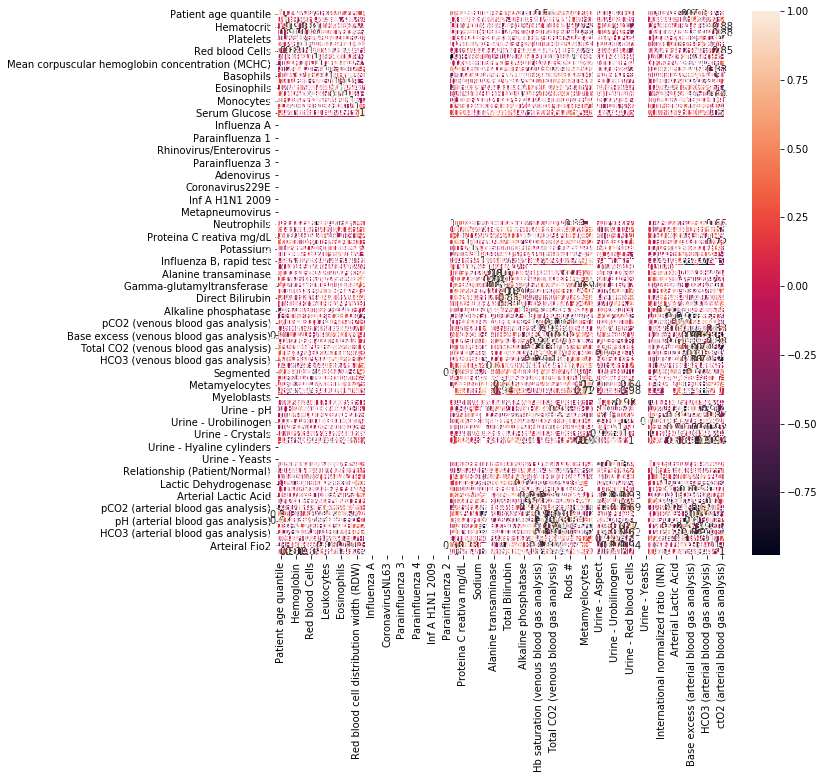

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(brazil_df.corr(),annot=True)

# Splitting the data into x and y for performing PCA

In [67]:
y=brazil_df['SARS-Cov-2 exam result']

In [68]:
brazil_df.replace('not_done', 0, inplace=True)

In [69]:
brazil_df.drop(['SARS-Cov-2 exam result'],axis=1,inplace=True)

In [70]:
x=brazil_df.iloc[:,:]

In [71]:
x=x.fillna("0")

In [72]:
x.head()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,...,Arterial Lactic Acid,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,0.236515,-0.0223403,-0.517413,0.0106766,0.102004,0.318366,-0.95079,-0.0946103,-0.223767,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)
x=df_x
print(x)

[[ 6.37244135e-01  7.14591503e-10  5.23411141e-09 ...  1.70819626e-09
  -2.77198989e-10 -3.62633848e-10]
 [ 1.32959813e+00  7.23593007e-01 -6.83475879e-02 ...  1.70819626e-09
  -2.77198989e-10 -3.62633848e-10]
 [-2.28198355e-01  7.14591503e-10  5.23411141e-09 ...  1.70819626e-09
  -2.77198989e-10 -3.62633848e-10]
 ...
 [-9.20552346e-01  7.14591503e-10  5.23411141e-09 ...  1.70819626e-09
  -2.77198989e-10 -3.62633848e-10]
 [ 1.17978641e-01  7.14591503e-10  5.23411141e-09 ...  1.70819626e-09
  -2.77198989e-10 -3.62633848e-10]
 [ 1.67577512e+00  2.12409438e+00  1.65685529e+00 ...  1.70819626e-09
  -2.77198989e-10 -3.62633848e-10]]


In [74]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(x)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
x=pca.transform(x)


In [76]:
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [77]:
# finding best random state
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i   
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate)

Accuracy SCORE is equal to : 0.9128277817150957 at random state 42
Accuracy SCORE is equal to : 0.8972360028348689 at random state 43
Accuracy SCORE is equal to : 0.9099929128277817 at random state 44
Accuracy SCORE is equal to : 0.8894401133947555 at random state 45
Accuracy SCORE is equal to : 0.9092841956059532 at random state 46
Accuracy SCORE is equal to : 0.9057406094968108 at random state 47
Accuracy SCORE is equal to : 0.9000708717221828 at random state 48
Accuracy SCORE is equal to : 0.9064493267186393 at random state 49
Accuracy SCORE is equal to : 0.8894401133947555 at random state 50
Accuracy SCORE is equal to : 0.9021970233876683 at random state 51
Accuracy SCORE is equal to : 0.9036144578313253 at random state 52
Accuracy SCORE is equal to : 0.9014883061658399 at random state 53
Accuracy SCORE is equal to : 0.9114103472714387 at random state 54
Accuracy SCORE is equal to : 0.9078667611622963 at random state 55
Accuracy SCORE is equal to : 0.8979447200566973 at random stat

In [78]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=91)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4233, 42) (1411, 42) (4233,) (1411,)


In [79]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [ ]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_


In [80]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'n_neighbors': 7}

In [81]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.9227498228206945


CROSS_VAL_SCORE = 0.9002504236490303


ROC_AUC_SCORE = 0.5378482328482328


 
 Classification Report 
                precision    recall  f1-score   support

           0       0.93      0.99      0.96      1300
           1       0.56      0.08      0.14       111

    accuracy                           0.92      1411
   macro avg       0.74      0.54      0.55      1411
weighted avg       0.90      0.92      0.90      1411



[[1293    7]
 [ 102    9]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, ma

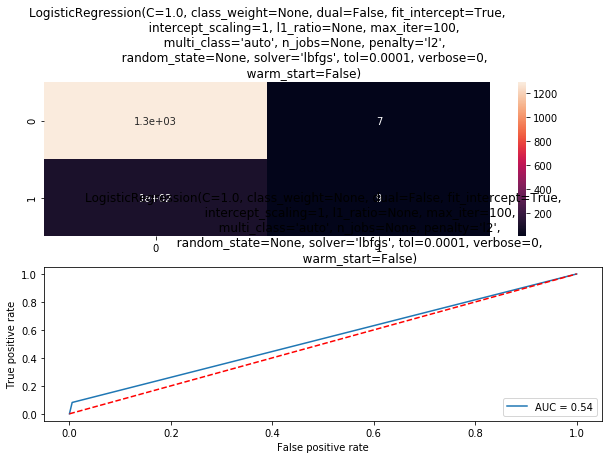

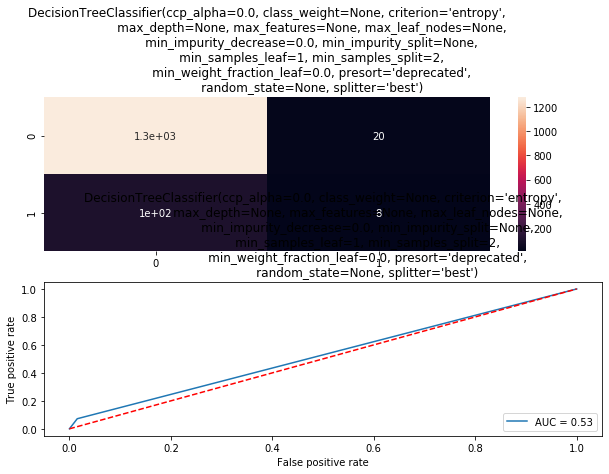

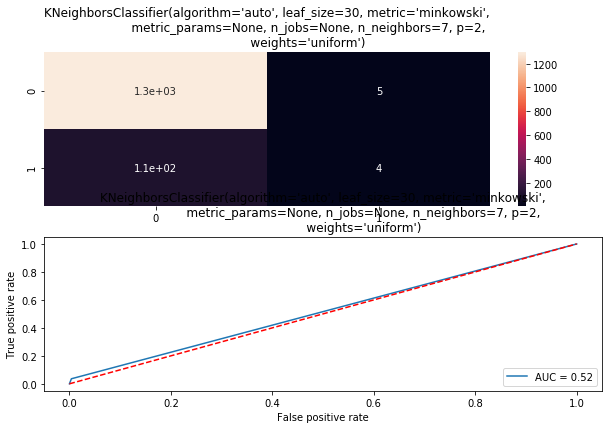

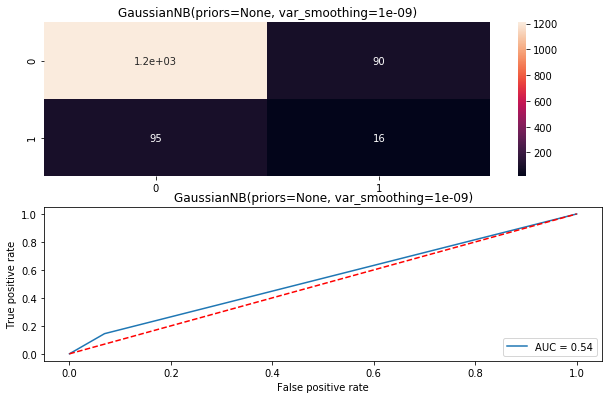

In [84]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='entropy'),KNeighborsClassifier(n_neighbors=7),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y_test,prediction))
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(models)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          

    

In [83]:
#Hence it is observed that logistic regression  is giving a good result, therefore finalizing it

In [85]:
lrg=LogisticRegression(penalty = 'l2')
lrg.fit(x_train,y_train)
prediction=lrg.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(lrg,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.9227498228206945
The Cross Val Score = 0.9002504236490303


In [86]:
from sklearn.externals import joblib
joblib.dump(lrg,"lrg_Brazil_covid.pkl")

['lrg_Brazil_covid.pkl']